In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
warnings.filterwarnings('ignore')
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import missingno as msno
#for visualizing missing data

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Projects/goibibo_flights_data.csv")

In [3]:
train.head()

flight date   airline flight_num    class   from dep_time      to arr_time  \
0  26-06-2023  SpiceJet    SG-8709  economy  Delhi    18:55  Mumbai    21:05   
1  26-06-2023  SpiceJet    SG-8157  economy  Delhi    06:20  Mumbai    08:40   
2  26-06-2023   AirAsia     I5-764  economy  Delhi    04:25  Mumbai    06:35   
3  26-06-2023   Vistara     UK-995  economy  Delhi    10:20  Mumbai    12:35   
4  26-06-2023   Vistara     UK-963  economy  Delhi    08:50  Mumbai    11:10   

  duration  price     stops  Unnamed: 11  Unnamed: 12  
0  02h 10m  6,013  non-stop          NaN          NaN  
1  02h 20m  6,013  non-stop          NaN          NaN  
2  02h 10m  6,016  non-stop          NaN          NaN  
3  02h 15m  6,015  non-stop          NaN          NaN  
4  02h 20m  6,015  non-stop          NaN          NaN

# Basic Information of our data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 29.8+ MB


# Our flight date coulmn is in object format we need to extract date
dep_time,arr_time and duration is in object need to extract time hour
price column also in object which was suppose to be in numeric format but it is in object so we need to analayze the data


# Descriptive Statistcis of our data

In [5]:
train.describe(include='all')

flight date  airline flight_num    class    from dep_time      to  \
count       300261   300261     300261   300261  300261   300261  300261   
unique          49        8       1569        2       6      251       6   
top     20-07-2023  Vistara     UK-706  economy   Delhi    07:00  Mumbai   
freq          6633   127859       3235   206774   61345     8760   59109   
mean           NaN      NaN        NaN      NaN     NaN      NaN     NaN   
std            NaN      NaN        NaN      NaN     NaN      NaN     NaN   
min            NaN      NaN        NaN      NaN     NaN      NaN     NaN   
25%            NaN      NaN        NaN      NaN     NaN      NaN     NaN   
50%            NaN      NaN        NaN      NaN     NaN      NaN     NaN   
75%            NaN      NaN        NaN      NaN     NaN      NaN     NaN   
max            NaN      NaN        NaN      NaN     NaN      NaN     NaN   

       arr_time duration   price   stops  Unnamed: 11  Unnamed: 12  
count    300261   300261  300261  300261          0.0          0.0  
unique      266      483   12170      40          NaN          NaN  
top       19:55  02h 10m  55,427  1-stop          NaN          NaN  
freq       9194     4242    1445  243603          NaN          NaN  
mean        NaN      NaN     NaN     NaN          NaN          NaN  
std         NaN      NaN     NaN     NaN          NaN          NaN  
min         NaN      NaN     NaN     NaN          NaN          NaN  
25%         NaN      NaN     NaN     NaN          NaN          NaN  
50%         NaN      NaN     NaN     NaN          NaN          NaN  
75%         NaN      NaN     NaN     NaN          NaN          NaN  
max         NaN      NaN     NaN     NaN          NaN          NaN

# Checking unique values in our data

In [6]:
for i in train.columns:
    print(i,train[i].unique())

flight date ['26-06-2023' '27-06-2023' '28-06-2023' '29-06-2023' '30-06-2023'
 '01-07-2023' '02-07-2023' '03-07-2023' '04-07-2023' '05-07-2023'
 '06-07-2023' '07-07-2023' '08-07-2023' '09-07-2023' '10-07-2023'
 '11-07-2023' '12-07-2023' '13-07-2023' '14-07-2023' '15-07-2023'
 '16-07-2023' '17-07-2023' '18-07-2023' '19-07-2023' '20-07-2023'
 '21-07-2023' '22-07-2023' '23-07-2023' '24-07-2023' '25-07-2023'
 '26-07-2023' '27-07-2023' '28-07-2023' '29-07-2023' '30-07-2023'
 '31-07-2023' '01-08-2023' '02-08-2023' '03-08-2023' '04-08-2023'
 '05-08-2023' '06-08-2023' '07-08-2023' '08-08-2023' '09-08-2023'
 '10-08-2023' '11-08-2023' '12-08-2023' '13-08-2023']
airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']
flight_num ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
class ['economy' 'business']
from ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
dep_time ['18:55' '06:20' '04:25' '10:20' '08:50' '11:40' '09:30' '14:20' '

# we can see 2 unkown columns doesnt share any relevant information that describes our data we can eleminate it

In [7]:
train.drop(columns=['Unnamed: 11'], axis=1, inplace=True)
train.drop(columns=['Unnamed: 12'], axis=1, inplace=True)

# Converting columns in thier original form

In [8]:
train['flight date'] = pd.to_datetime(train['flight date'])

train['dep_time'] = train['dep_time'].astype(str)
train['arr_time'] = train['arr_time'].astype(str)

train['dep_time'] = train['dep_time'].str.extract(r'(\d{2}:\d{2})')[0]
train['arr_time'] = train['arr_time'].str.extract(r'(\d{2}:\d{2})')[0]

train['dep_time'] = pd.to_datetime(train['dep_time'], format='%H:%M', errors='coerce')
train['arr_time'] = pd.to_datetime(train['arr_time'], format='%H:%M', errors='coerce')

train['dep_time'] = train['dep_time'].dt.strftime('%H:%M:%S')
train['arr_time'] = train['arr_time'].dt.strftime('%H:%M:%S')

In [9]:
# Function to handle duration conversion with error handling for non-integer values
def convert_duration(duration):
    try:
        # Split the string by 'h' and 'm' and ensure only numeric values are used
        hours, minutes = duration.replace('h', '').replace('m', '').split()
        hours = int(float(hours))  # Convert to float to handle cases like '1.03'
        minutes = int(float(minutes))
        return '{:02}:{:02}:00'.format(hours, minutes)
    except Exception as e:
        return '00:00:00'  # Return a default value in case of an error
train['duration'] = train['duration'].apply(convert_duration)

In [10]:
train['price'] = train['price'].replace({'₹': '', '$': '', ',': ''}, regex=True).astype(float)

In [11]:
train.columns

Index(['flight date', 'airline', 'flight_num', 'class', 'from', 'dep_time',
       'to', 'arr_time', 'duration', 'price', 'stops'],
      dtype='object')

# Checking null values

In [12]:
train.isnull().sum()

flight date    0
airline        0
flight_num     0
class          0
from           0
dep_time       0
to             0
arr_time       0
duration       0
price          0
stops          0
dtype: int64

# EDA

In [13]:
train['class'].value_counts()

class
economy     206774
business     93487
Name: count, dtype: int64

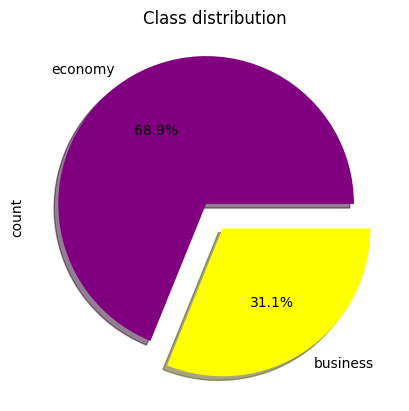

In [14]:
train['class'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,
                                         colors=['purple','yellow'],textprops = {'fontsize':10}).set_title('Class distribution')

plt.show;

# It is seen that most prefered class is economy class
economy=68.9%
business=31.1%

# Airline Distribution

In [15]:
train.airline.value_counts()

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

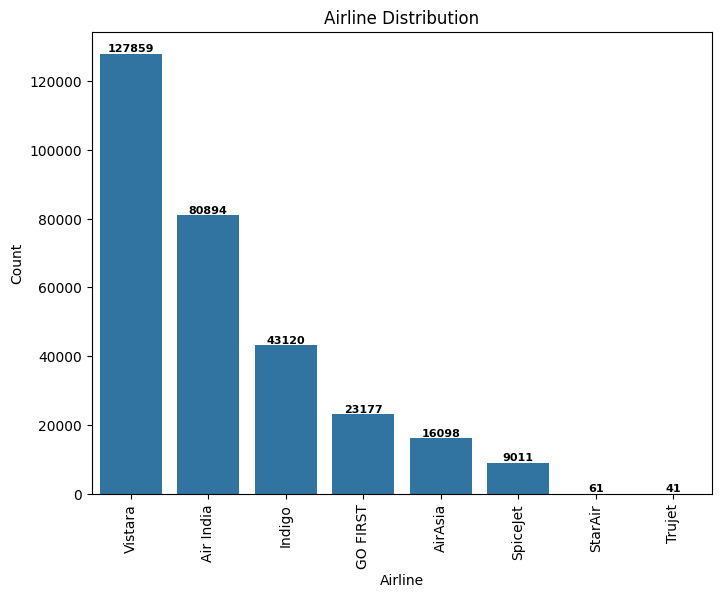

In [16]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='airline', data=train, order=train['airline'].value_counts().index)
plt.gca()
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline Distribution')
for container in ax.containers:
  ax.bar_label(container, fmt='%d', label_type='edge',fontsize=8,fontweight='bold')
plt.show()

# Business and Economy class

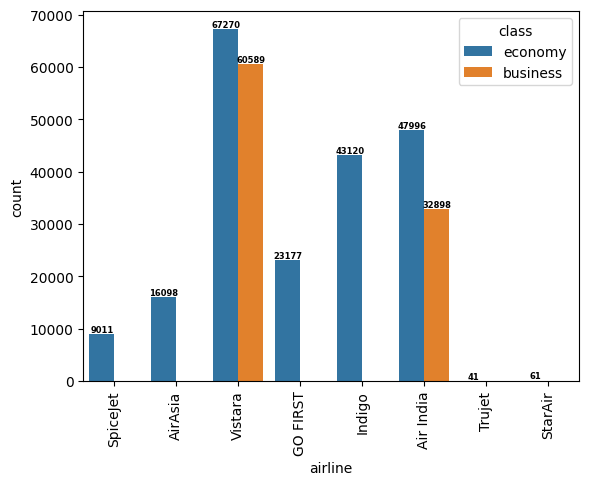

In [17]:
ax=sns.countplot(x=train['airline'],hue=train['class'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.gca()
for container in ax.containers:
  ax.bar_label(container , fmt='%d', fontsize=6, fontweight='bold', label_type='edge')

plt.show()

# Sunburst Airline -- from

In [18]:
import plotly.express as px
plt.figure(figsize=(4,4))
fig = px.sunburst(train, path=['from', 'airline'], values=None)
fig.update_layout(width=400, height=400, margin=dict(l=4, r=4, t=4, b=3))
fig.show()


<Figure size 400x400 with 0 Axes>

# Sunburts(Airline -- to)

In [19]:
fig=px.sunburst(train, path=['airline','to'], values=None)
fig.update_layout(width=400, height=400, margin=dict(l=4,r=4,t=4,b=4))
fig.show()

Count the Number of Flights  'from'  -- 'to' (Manual Grouping)

In [20]:
train_sunburst = train.groupby(['from','to']).size().reset_index(name='count')
fig = px.sunburst(train_sunburst, path=['from','to'], values='count')
fig.update_layout(height=400, width=400, margin=dict(l=4,r=4,t=4,b=4))
fig.show()


In [21]:
train.columns

Index(['flight date', 'airline', 'flight_num', 'class', 'from', 'dep_time',
       'to', 'arr_time', 'duration', 'price', 'stops'],
      dtype='object')

# Violin Plot → Compare price across flight classes

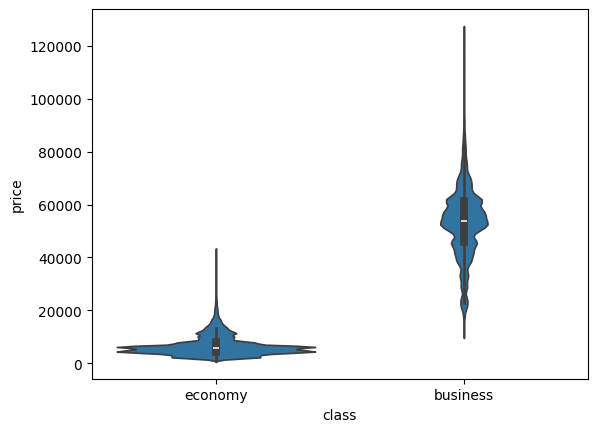

In [22]:
sns.violinplot(x='class', y='price', data=train)
plt.show()

Bivariate Analysis
Categorical vs Numerical
Boxplot → Compare price across airlines

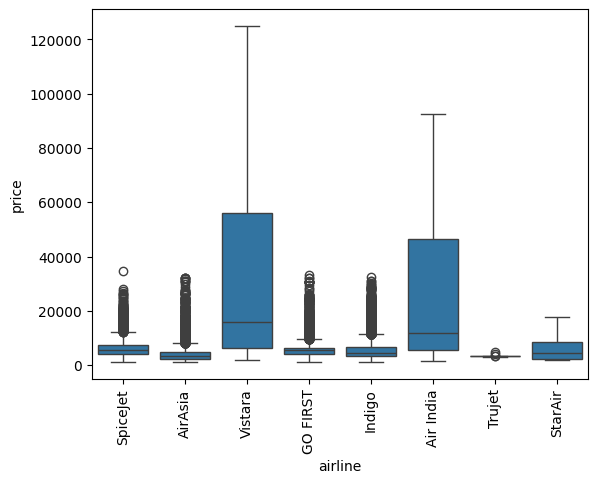

In [23]:
sns.boxplot(x='airline', y='price', data=train)
plt.xticks(rotation=90)
plt.show()

# Histogram → Show price distribution


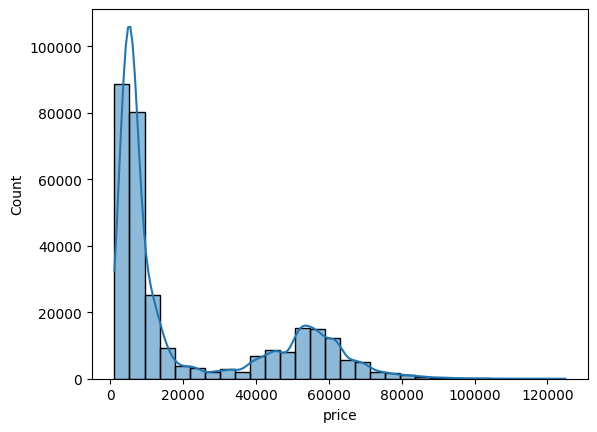

In [24]:
sns.histplot(train['price'], bins=30, kde=True)
plt.show()

# Time-Based Analysis (flight date, dep_time, arr_time)
Line Plot → Show price trends over time

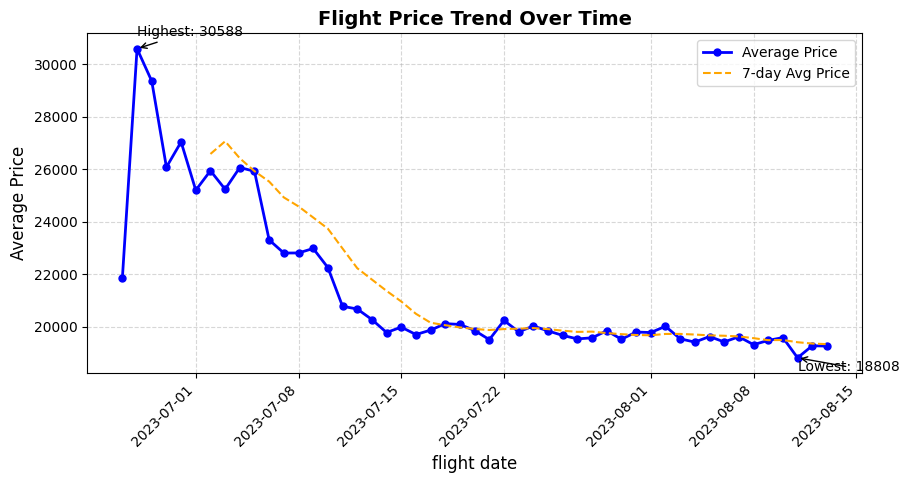

In [25]:
import matplotlib.pyplot as plt

# Convert flight date to datetime if not already
train['flight date'] = pd.to_datetime(train['flight date'])

# Group by date and calculate mean price
price_trend = train.groupby('flight date')['price'].mean()

# Create a detailed line plot
plt.figure(figsize=(10, 5))  # Adjust figure size
plt.plot(price_trend, marker='o', linestyle='-', color='b', linewidth=2, markersize=5, label='Average Price')

# Add title and labels
plt.title('Flight Price Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Flight Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

max_date = price_trend.idxmax()  # Date with highest price
min_date = price_trend.idxmin()  # Date with lowest price

plt.annotate(f'Highest: {price_trend.max():.0f}', xy=(max_date, price_trend.max()),
             xytext=(max_date, price_trend.max()+500),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10)

plt.annotate(f'Lowest: {price_trend.min():.0f}', xy=(min_date, price_trend.min()),
             xytext=(min_date, price_trend.min()-500),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10)

price_trend.rolling(window=7).mean().plot(label='7-day Avg Price', linestyle='--', color='orange')
plt.legend()


# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend()

# Show the plot
plt.show()


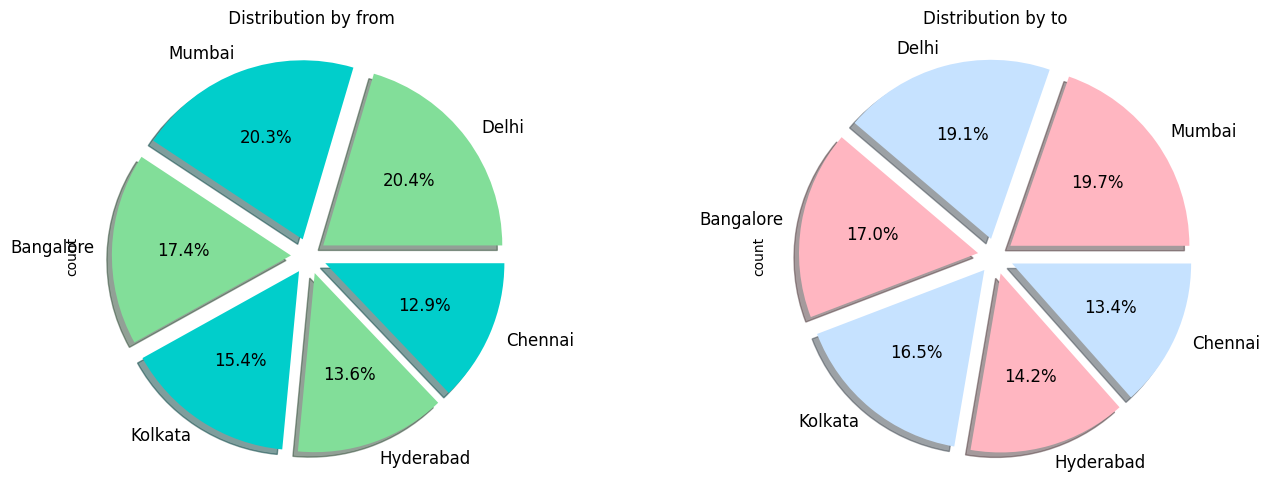

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
explode_source = [0.1] * len(train['from'].value_counts())  # Ensure explode list matches the number of categories
g2 = train['from'].value_counts().plot.pie(explode=explode_source, autopct='%1.1f%%', shadow=True,
                                            colors=["#82DE99", "#01CECB"], textprops={'fontsize': 12}, ax=axes[0])
g2.set_title(" Distribution by from")

explode_dest = [0.1] * len(train['to'].value_counts())  # Ensure explode list matches the number of categories
g3 = train['to'].value_counts().plot.pie(explode=explode_dest, autopct='%1.1f%%', shadow=True,
                                                 colors=["#FFB6C1", "#C6E2FF"], textprops={'fontsize': 12}, ax=axes[1])
g3.set_title("Distribution by to")

plt.tight_layout()
plt.show()


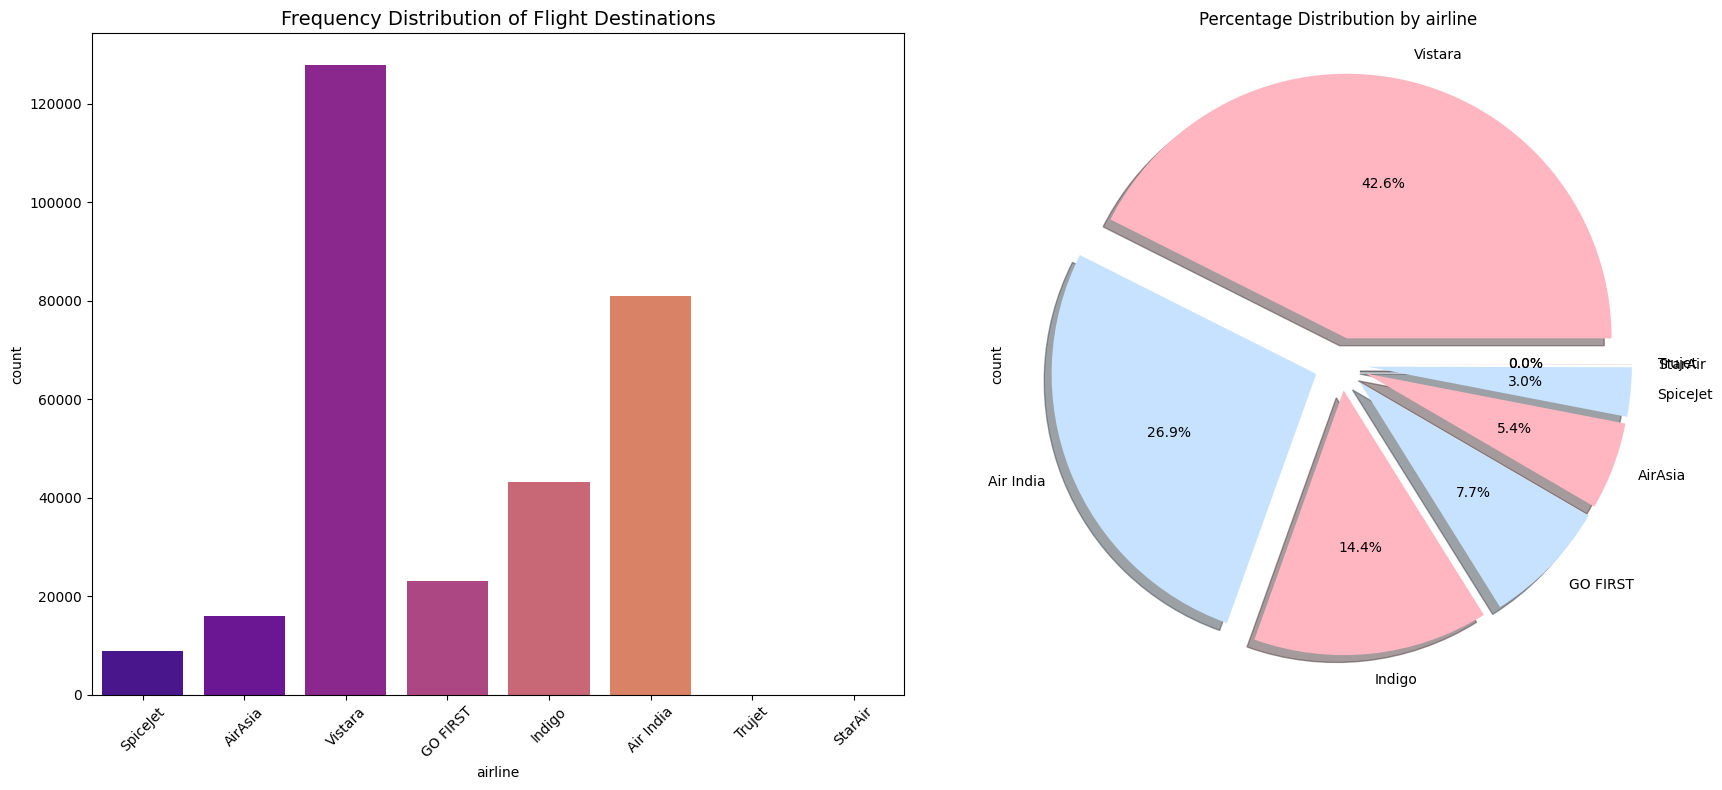

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Countplot for Frequency Distribution
sns.countplot(data=train, x='airline', palette='plasma', ax=axes[0])
axes[0].set_title('Frequency Distribution of Flight Destinations', fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  # Rotate labels if needed


explode_dest = [0.1] * len(train['airline'].value_counts())  # Ensure explode list matches the number of categories
e2=train['airline'].value_counts().plot.pie(explode=explode_dest, autopct='%1.1f%%', shadow=True,
                                                 colors=["#FFB6C1", "#C6E2FF"], textprops={'fontsize': 10}, ax=axes[1])
e2.set_title("Percentage Distribution by airline ")

plt.tight_layout()
plt.show()

# Pre-Processing data

In [28]:
colname=[]
for x in train.columns:
  if train[x].dtypes =='object':
    colname.append(x)
colname

['airline',
 'flight_num',
 'class',
 'from',
 'dep_time',
 'to',
 'arr_time',
 'duration',
 'stops']

In [29]:
colname_n=[]
for j in train.columns:
  if train[j].dtypes =='int64':
    colname_n.append(j)
colname_n

[]

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in colname:
  train[x]=le.fit_transform(train[x])
  le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
  print('feature',x)
  print('mapping',le_name_mapping)


feature airline
mapping {'Air India': 0, 'AirAsia': 1, 'GO FIRST': 2, 'Indigo': 3, 'SpiceJet': 4, 'StarAir': 5, 'Trujet': 6, 'Vistara': 7}
feature flight_num
mapping {'2T-515': 0, '2T-518': 1, '2T-621': 2, '2T-623': 3, '6E-102': 4, '6E-105': 5, '6E-113': 6, '6E-121': 7, '6E-123': 8, '6E-126': 9, '6E-128': 10, '6E-131': 11, '6E-132': 12, '6E-134': 13, '6E-135': 14, '6E-136': 15, '6E-138': 16, '6E-139': 17, '6E-146': 18, '6E-148': 19, '6E-149': 20, '6E-151': 21, '6E-152': 22, '6E-153': 23, '6E-154': 24, '6E-156': 25, '6E-157': 26, '6E-161': 27, '6E-164': 28, '6E-165': 29, '6E-168': 30, '6E-171': 31, '6E-172': 32, '6E-176': 33, '6E-177': 34, '6E-179': 35, '6E-181': 36, '6E-183': 37, '6E-184': 38, '6E-186': 39, '6E-188': 40, '6E-192': 41, '6E-193': 42, '6E-198': 43, '6E-199': 44, '6E-2001': 45, '6E-2005': 46, '6E-2007': 47, '6E-2008': 48, '6E-2009': 49, '6E-201': 50, '6E-2013': 51, '6E-2015': 52, '6E-2016': 53, '6E-2022': 54, '6E-2025': 55, '6E-2026': 56, '6E-2027': 57, '6E-2028': 58, '6E-

# Correlation Matrix

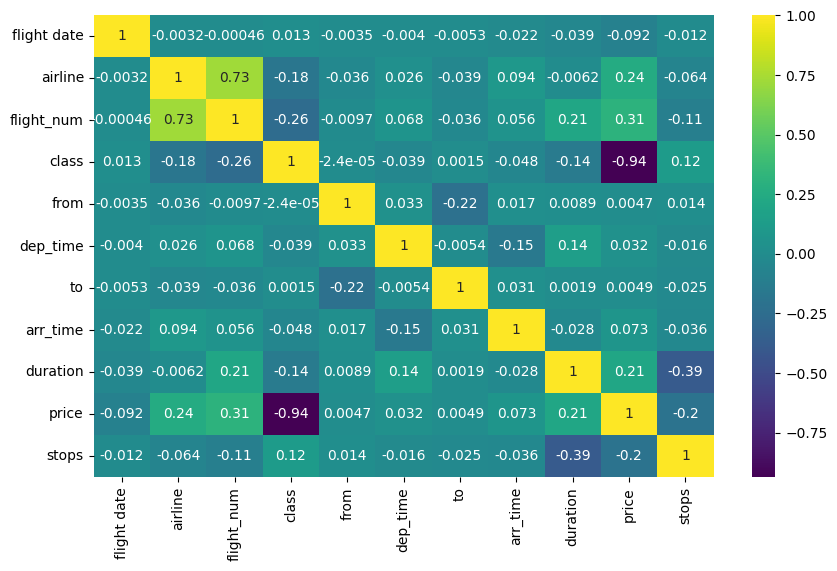

In [31]:
plt.figure(figsize=(10,6))
corr=train.corr()
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

Key Observations:
Strong Negative Correlation:

class and price (-0.94): This indicates that as the class increases (e.g., economy to business), the price decreases significantly.
stops and duration (-0.39): More stops generally reduce the duration, possibly due to shorter individual flight legs.
Strong Positive Correlation:

airline and flight_num (0.73): The airline and flight number are strongly correlated, which makes sense as each airline has a specific range of flight numbers.
price and duration (0.21): Longer flight duration slightly increases the price.
Moderate Correlations:

flight_num and duration (0.21): Specific flight numbers may be associated with longer routes.
airline and price (0.24): Different airlines have different pricing structures.
duration and price (0.21): Longer flights tend to be more expensive.
Low/Weak Correlations:

flight date has almost no correlation with other features, meaning the date itself doesn’t impact other factors significantly.
dep_time and arr_time have weak correlations with most variables.

Important Features for Analysis:
Based on this correlation heatmap, the most important features that influence price and duration are:

class (strong negative impact on price)
flight_num (moderately impacts duration and price)
airline (moderate influence on price)
duration (influences price and is affected by stops)
stops (impacts duration and price)

# Feature Selection

In [32]:
train

flight date  airline  flight_num  class  from  dep_time  to  arr_time  \
0       2023-06-26        4        1416      1     2       190   5       230   
1       2023-06-26        4        1395      1     2        40   5        81   
2       2023-06-26        1        1217      1     2        17   5        56   
3       2023-06-26        7        1567      1     2        88   5       128   
4       2023-06-26        7        1557      1     2        70   5       111   
...            ...      ...         ...    ...   ...       ...  ..       ...   
300256  2023-08-13        7        1485      0     1        81   3       215   
300257  2023-08-13        7        1489      0     1       113   3       252   
300258  2023-08-13        7        1494      0     1        49   3       228   
300259  2023-08-13        7        1491      0     1        48   3       181   
300260  2023-08-13        7        1485      0     1        81   3       215   

        duration    price  stops  
0             17   6013.0     39  
1             19   6013.0     39  
2             17   6016.0     39  
3             18   6015.0     39  
4             19   6015.0     39  
...          ...      ...    ...  
300256       114  70304.0      0  
300257       118  78262.0      0  
300258       160  80285.0      0  
300259       113  82809.0      0  
300260       114  82809.0      0  

[300261 rows x 11 columns]

In [33]:
train.drop('flight date', axis=1,inplace=True)

In [34]:
X=train.iloc[:,0:-1]
Y=train.iloc[:,-1]

In [35]:
print(X.shape)
print(Y.shape)

(300261, 9)
(300261,)


# Scaling the data

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test,=train_test_split(X,Y, test_size=0.2,random_state=42)

In [38]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240208, 9)
(240208,)
(60053, 9)
(60053,)


# Model Building

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Defineing Models

In [ ]:
models={"Linear Regression":LinearRegression(),
        "DecisionTreeRegressor":DecisionTreeRegressor(),
        "RandomForestRegressor":RandomForestRegressor(),
        "GradientBoostingregressor":GradientBoostingRegressor(),
        "AdaBoostRegressor":AdaBoostRegressor(),
        "XgboostRegressor":XGBRegressor(),
        "ExtraTressRegressor":ExtraTreesRegressor(),
        "SVR":SVR(),
        "KNeighborsRegressor":KNeighborsRegressor()}

results={}

# Train and Evaluvate models
for name,model in models.items():
  model.fit(X_train,Y_train)
  y_pred=model.predict(X_test)

# Metrics
  mse=mean_squared_error(Y_test,y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(Y_test,y_pred)
  mae=mean_absolute_error(Y_test,y_pred)
  mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100

# Adjusted R-sqaured
  n=len(X_test)
  p=X_test.shape[1]
  adj_r2=1-(1-r2) * (n-1) / (n- p- 1) if n > p + 1 else None



  results[name]={"MSE":mse, "RMSE":rmse,"R2":r2,"MAE":mae,"MAPE":mape,"Adj_R2":adj_r2}

  print(f"\nModel: {name}")
  print(f'Mean Sqaured Error: {mse:.4f}')
  print(f'Root Mean Sqaured Error {rmse:.4f}')
  print(f'Mean Absolute Error {mae:4f}')
  print(f'R- Squared {r2:.4f}')
  print(f'Adjusted R-sqaured {adj_r2:.4f}')


Model: Linear Regression
Mean Sqaured Error: 168.3814
Root Mean Sqaured Error 12.9762
Mean Absolute Error 9.891194
R- Squared 0.1948
Adjusted R-sqaured 0.1947

Model: DecisionTreeRegressor
Mean Sqaured Error: 11.2413
Root Mean Sqaured Error 3.3528
Mean Absolute Error 0.379529
R- Squared 0.9462
Adjusted R-sqaured 0.9462

Model: RandomForestRegressor
Mean Sqaured Error: 8.3289
Root Mean Sqaured Error 2.8860
Mean Absolute Error 0.431644
R- Squared 0.9602
Adjusted R-sqaured 0.9602

Model: GradientBoostingregressor
Mean Sqaured Error: 51.1432
Root Mean Sqaured Error 7.1514
Mean Absolute Error 3.341375
R- Squared 0.7554
Adjusted R-sqaured 0.7554

Model: AdaBoostRegressor
Mean Sqaured Error: 143.9610
Root Mean Sqaured Error 11.9984
Mean Absolute Error 9.924958
R- Squared 0.3116
Adjusted R-sqaured 0.3115

Model: XgboostRegressor
Mean Sqaured Error: 16.6821
Root Mean Sqaured Error 4.0844
Mean Absolute Error 1.679681
R- Squared 0.9202
Adjusted R-sqaured 0.9202

Model: ExtraTressRegressor
Mean S

# Project Analysis and Final Report Suggestions

# Project Summary:
# This project analyzes flight price data to identify factors influencing price and develop predictive models.
# The analysis involves data cleaning, exploratory data analysis (EDA), feature engineering, and model training.

# Key Findings from the Analysis:
# 1. Class significantly impacts price (strong negative correlation). Business class flights are more expensive.
# 2. Airline choice moderately influences price.
# 3. Flight duration is positively correlated with price.
# 4. The number of stops and duration have a negative correlation.
# 5. Certain airlines show higher prices, and flight routes have varying demand.
# 6. The 'flight date' appears to have minimal correlation with other factors, but visual analysis of price trend over time is included.


# Model Performance:
# Several regression models were trained and evaluated using metrics like MSE, RMSE, MAE, R-squared, and adjusted R-squared.
# The best performing model should be clearly identified in the final report.

# Business Recommendations:
# 1. **Pricing Strategy:** The strong correlation between class and price suggests opportunities for dynamic pricing based on class, airline, and duration.  Analyze profitable price points within different classes, and consider route-specific pricing.
# 2. **Airline Selection:**  Understand customer preferences for airlines and consider partnerships with airlines that align with customer demand and offer good pricing. Evaluate the cost-benefit of potentially higher-priced airlines.
# 3. **Route Optimization:** Further investigate high-demand routes and adjust pricing or capacity accordingly. Consider introducing more options on less profitable routes.
# 4. **Stop Management:** Analyze the impact of stops on prices and durations.  Customers may prefer less stopovers, so price and package options should include this.
# 5. **Dynamic Pricing Model Deployment:**  Deploy the best-performing predictive model to forecast flight prices. Integrate this into a real-time pricing system for dynamic adjustments based on factors like demand, time of booking, etc.
# 6. **Customer Segmentation:**  Investigate customer segmentation based on preferences (price vs. airline, stops, etc.) and target specific segments with tailored promotions and pricing offers.

# Further Improvements:
# 1. **Feature Engineering:** Explore more advanced feature engineering such as time of day, day of the week effects, holidays, and seasonality.
# 2. **Outlier Treatment:** Further examine and handle outliers in the 'price' data.  Outliers can impact model accuracy.
# 3. **Model Tuning:**  More thorough hyperparameter tuning for each model could improve their performance.  Cross-validation can ensure the model generalizes better.
# 4. **External Data Sources:**  Integrate external data such as fuel prices, economic indicators, and competitor pricing to improve prediction accuracy.
# 5. **Explainability:** Use techniques like SHAP values to explain how the model arrived at a particular prediction.
# 6. **Visualizations:** Improve visualization of data trends and insights to enhance report clarity.

# Final Report Structure Suggestions:
# 1. Executive Summary: Summarize key findings, business recommendations, and project goals.
# 2. Data Description: Describe the data source, features, and data quality issues.
# 3. Exploratory Data Analysis (EDA): Present visualizations and findings from the data exploration. Focus on insights relevant to business recommendations.
# 4. Pre-processing: Describe data cleaning steps, feature engineering, and feature scaling.
# 5. Model Development: Detail the models used, evaluation metrics, and performance comparisons. Emphasize the best-performing model.
# 6. Results and Discussion:  Discuss the model results, their implications for the business, and any limitations of the findings.
# 7. Business Recommendations: Clearly articulate actionable recommendations.
# 8. Future Work: Suggest future research directions and improvements.
# 9. Conclusion: Summarize the project findings and their overall significance.
